In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial.transform import Rotation as R
import sympy as sp



# WEEK 1

is info anoute overal robots
and focuse in on robort arms and there joints (use if need to look up description that is not meath)

In [3]:
#Check if R is orthogonal
def is_orthogonal(R):
    print("R matrix:")
    print(R)
    print("\nR.T @ R (should be identity matrix):")
    print(R.T @ R)
    print("\nDeterminant of R (should be 1):")
    print(np.linalg.det(R))
    print("\nVerification: R.T @ R == I?")
    print(np.allclose(R.T @ R, np.eye(3)))
    return np.allclose(R.T @ R, np.eye(3))

# WEEK 2

1 joiunt on dof (deagre of fredom)


## Rotation basiks
Funktion:

creat_rotation_matrix_from_xyz_cords -findes R01 given x0,y0,z1,x1,y1,z1 descripte in the saem frame if o1 and o0 is the same 

Rx,Ry,Rz -basick rotation matrixc around x y z axes whit angle theta 

![week 2 img1.jpg](<attachment:week 2 img1.jpg>)
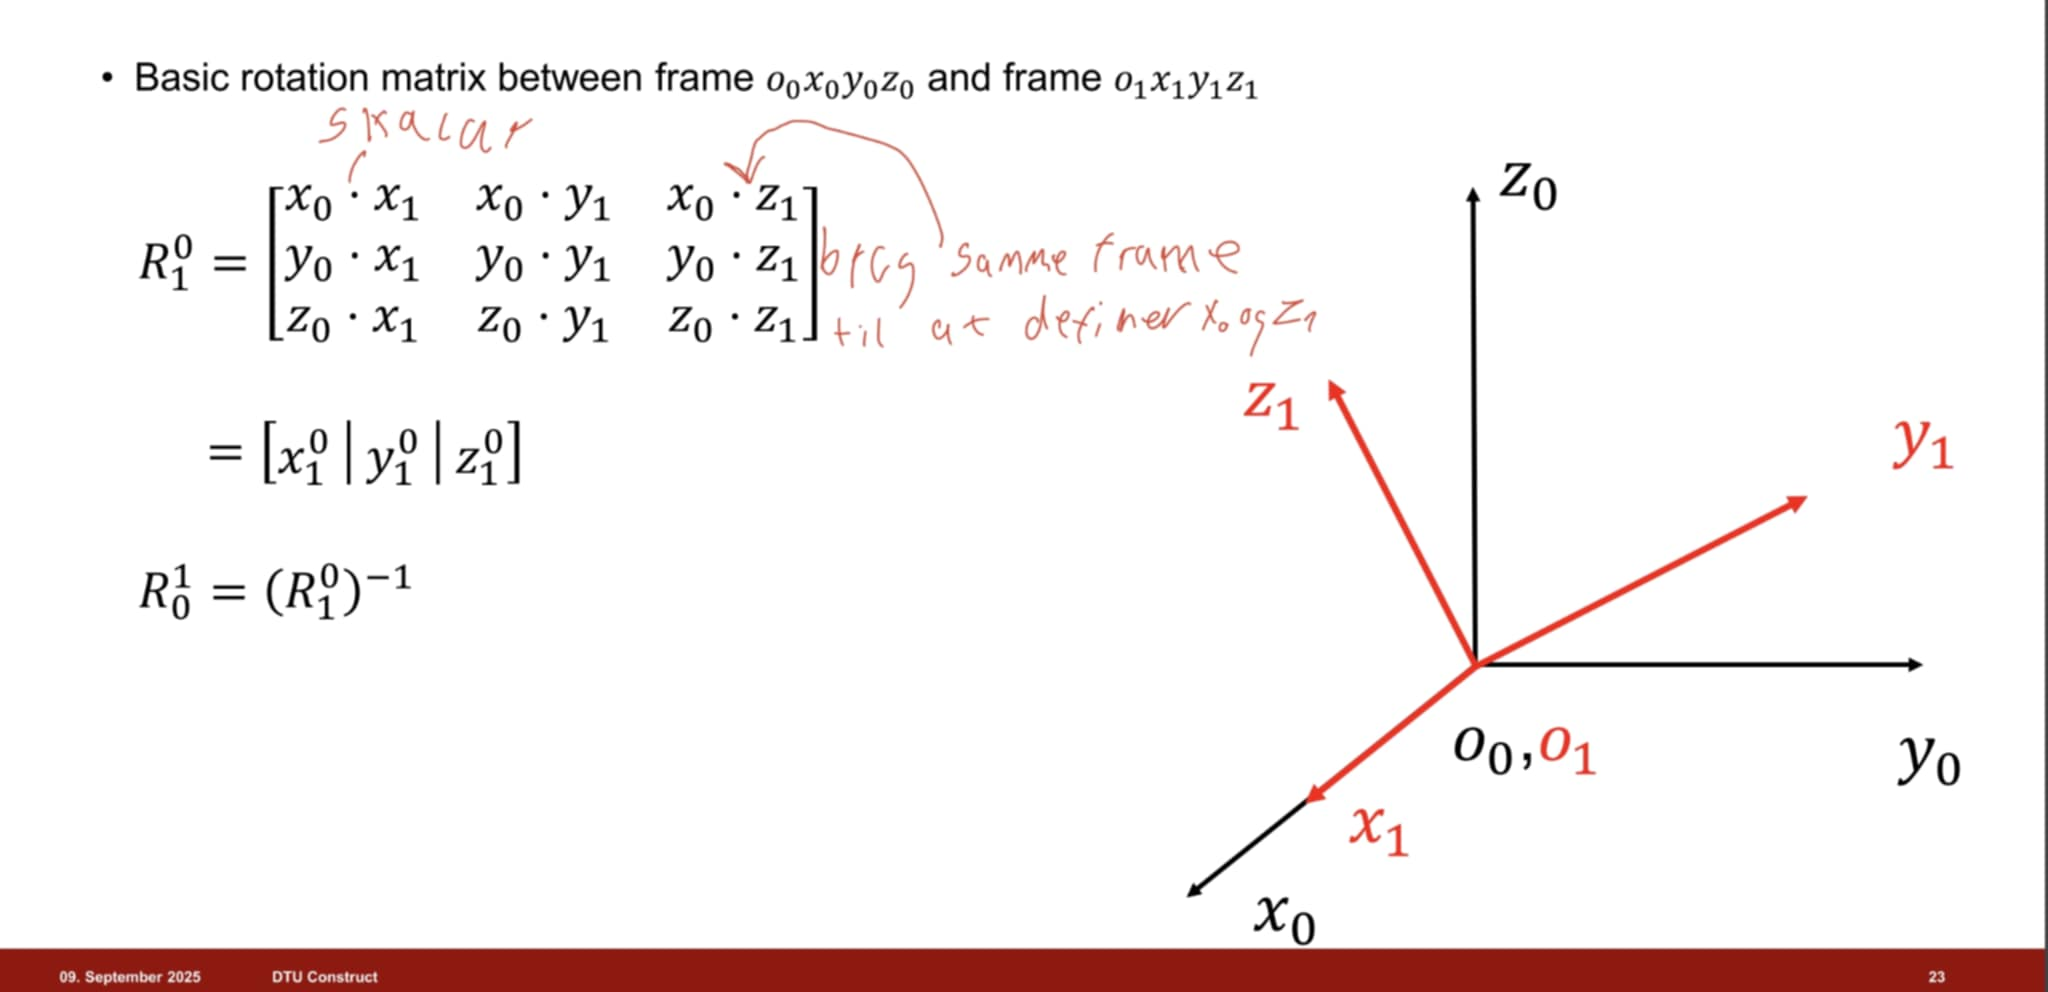

### functions

In [4]:
def creat_rotation_matrix_from_xyz_cords(fram1,fram2, symbolic=False):
    if symbolic:
        r = sp.Matrix.zeros(3, 3)
        for i in range(3):
            r[0, i] = fram1[0].dot(fram2[i])
            r[1, i] = fram1[1].dot(fram2[i])
            r[2, i] = fram1[2].dot(fram2[i])
    else:
        r = np.zeros((3,3))
        for i in range(3):
            r[0][i] = np.dot(fram1[0],fram2[i])
            r[1][i] = np.dot(fram1[1],fram2[i])
            r[2][i] = np.dot(fram1[2],fram2[i])
    return r

#basick rotation matrixc around x y z axes whit angle theta
def Rx(theta, symbolic=False): 
    if symbolic:
        r = sp.Matrix([[1, 0, 0],
                      [0, sp.cos(theta), -sp.sin(theta)],
                      [0, sp.sin(theta), sp.cos(theta)]])
    else:
        r = np.array([[1, 0, 0],
                     [0, math.cos(theta), -math.sin(theta)],
                     [0, math.sin(theta), math.cos(theta)]])
    return r

def Ry(theta, symbolic=False): 
    if symbolic:
        r = sp.Matrix([[sp.cos(theta), 0, sp.sin(theta)],
                      [0, 1, 0],
                      [-sp.sin(theta), 0, sp.cos(theta)]])
    else:
        r = np.array([[math.cos(theta), 0, math.sin(theta)],
                     [0, 1, 0],
                     [-math.sin(theta), 0, math.cos(theta)]])
    return r

def Rz(theta, symbolic=False): 
    if symbolic:
        r = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0],
                      [sp.sin(theta), sp.cos(theta), 0],
                      [0, 0, 1]])
    else:
        r = np.array([[math.cos(theta), -math.sin(theta), 0],
                     [math.sin(theta), math.cos(theta), 0],
                     [0, 0, 1]])
    return r

#P0=R01*P1
#P1=R01^T*P0
def finde_p0_from_p1_and_r01(P1, R01, symbolic=False):
    if symbolic:
        P0 = R01 * P1
    else:
        P0 = R01 @ P1
    return P0

def finde_p1_from_p0_and_r01(P0, R01, symbolic=False):
    if symbolic:
        P1 = R01.T * P0
    else:
        P1 = R01.T @ P0
    return P1

#p0a -> p0b 
#p0b = r01 @ p0a
def rotate_p0a_to_p0b(p0a, r01, symbolic=False): #this function rotate p0a (a point in frame0) to p0b (the same point in frame1) so it move compared to world frame
    if symbolic:
        p0b = r01 * p0a
    else:
        p0b = r01 @ p0a
    return p0b

def rotation_matrix_to_euler_angles_zyz(R, symbolic=False):
    """
    Extract Euler angles (ZYZ convention) from rotation matrix R
    Returns: (phi, theta, psi) in radians
    where phi is first rotation around Z, theta around Y, psi around Z again
    """
    if symbolic:
        theta = sp.acos(R[2, 2])
        phi = sp.atan2(R[1, 2], R[0, 2])
        psi = sp.atan2(R[2, 1], -R[2, 0])
    else:
        # Check if R[2,2] is close to ±1 (gimbal lock case)
        if abs(R[2, 2]) != 1:
            theta = math.acos(R[2, 2])
            phi = math.atan2(R[1, 2], R[0, 2])
            psi = math.atan2(R[2, 1], -R[2, 0])
        else:
            # Gimbal lock case
            psi = 0  # Set psi to 0 arbitrarily
            if R[2, 2] == 1:
                theta = 0
                phi = math.atan2(R[1, 0], R[0, 0])
            else:
                theta = math.pi
                phi = math.atan2(-R[1, 0], R[0, 0])
    
    return phi, theta, psi

### Exampel use numeric

In [5]:
#findes R01 if o1 and o0 is the same
x0=[1,0,0]
y0=[0,1,0]
z0=[0,0,1]
x1=[0.5,0.5,0]
y1=[-0.5,0.5,0]
z1=[0,0,1]

# Normalize all vectors
x0=np.array(x0)/np.linalg.norm(x0)
y0=np.array(y0)/np.linalg.norm(y0)
z0=np.array(z0)/np.linalg.norm(z0)
x1=np.array(x1)/np.linalg.norm(x1)
y1=np.array(y1)/np.linalg.norm(y1)
z1=np.array(z1)/np.linalg.norm(z1)

frame1=[x0,y0,z0]
frame2=[x1,y1,z1]

r=creat_rotation_matrix_from_xyz_cords(frame1,frame2)
print(r)



[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [7]:
#test rotation matrix
theta_x=math.pi/4   
theta_y=math.pi/4
theta_z=math.pi/4
R_test=Rz(theta_z)@Ry(theta_y)@Rx(theta_x) #this Rotate
print(R_test)



[[ 0.5        -0.14644661  0.85355339]
 [ 0.5         0.85355339 -0.14644661]
 [-0.70710678  0.5         0.5       ]]


In [8]:
#test finde p0 from p1 and r01
P1=np.array([1,1,1])
P0=finde_p0_from_p1_and_r01(P1,r)
print(P0)
#test finde p1 from p0 and r01
P1_new=finde_p1_from_p0_and_r01(P0,r)
print(P1_new)

[0.         1.41421356 1.        ]
[1. 1. 1.]


In [9]:
# Test the function with existing rotation matrix R_test
phi, theta, psi = rotation_matrix_to_euler_angles_zyz(R_test)
print(f"Euler angles (ZYZ): phi={phi:.4f}, theta={theta:.4f}, psi={psi:.4f}")
print(f"In degrees: phi={math.degrees(phi):.2f}°, theta={math.degrees(theta):.2f}°, psi={math.degrees(psi):.2f}°")

this_R = R.from_matrix(R_test)
out=this_R.as_euler('zyz', degrees=False) # Use degrees=True for degrees
print(out)

# Verify by reconstructing the rotation matrix from both sets of angles
print("Original R_test:")
print(R_test)
print("\n" + "="*50)

Euler angles (ZYZ): phi=-0.1699, theta=1.0472, psi=0.6155
In degrees: phi=-9.74°, theta=60.00°, psi=35.26°
[ 0.61547971  1.04719755 -0.16991845]
Original R_test:
[[ 0.5        -0.14644661  0.85355339]
 [ 0.5         0.85355339 -0.14644661]
 [-0.70710678  0.5         0.5       ]]



In [10]:
# From custom function (extrinsic ZYZ)
phi_custom, theta_custom, psi_custom = phi, theta, psi
R_reconstructed_custom = Rz(phi_custom) @ Ry(theta_custom) @ Rz(psi_custom)
print("\nReconstructed from custom function angles:")
print(R_reconstructed_custom)
print("Match with R_test?", np.allclose(R_test, R_reconstructed_custom))

# From SciPy (intrinsic zyz)
scipy_angles = out  # [0.6155, 1.0472, -1.7407]
R_reconstructed_scipy = R.from_euler('zyz', scipy_angles, degrees=False).as_matrix()
print("\nReconstructed from SciPy angles:")
print(R_reconstructed_scipy)
print("Match with R_test?", np.allclose(R_test, R_reconstructed_scipy))


Reconstructed from custom function angles:
[[ 0.5        -0.14644661  0.85355339]
 [ 0.5         0.85355339 -0.14644661]
 [-0.70710678  0.5         0.5       ]]
Match with R_test? True

Reconstructed from SciPy angles:
[[ 0.5        -0.14644661  0.85355339]
 [ 0.5         0.85355339 -0.14644661]
 [-0.70710678  0.5         0.5       ]]
Match with R_test? True


### Exampel use symbolic

In [21]:
# Define symbolic variables for frame 0
x0_x, x0_y, x0_z = sp.symbols('x0x x0y x0z', real=True)
y0_x, y0_y, y0_z = sp.symbols('y0x y0y y0z', real=True)
z0_x, z0_y, z0_z = sp.symbols('z0x z0y z0z', real=True)

# Define symbolic variables for frame 1
x1_x, x1_y, x1_z = sp.symbols('x1x x1y x1z', real=True)
y1_x, y1_y, y1_z = sp.symbols('y1x y1y y1z', real=True)
z1_x, z1_y, z1_z = sp.symbols('z1x z1y z1z', real=True)

# Create symbolic vectors for frame 0
x0_sym = sp.Matrix([x0_x, x0_y, x0_z])
y0_sym = sp.Matrix([y0_x, y0_y, y0_z])
z0_sym = sp.Matrix([z0_x, z0_y, z0_z])

# Create symbolic vectors for frame 1
x1_sym = sp.Matrix([x1_x, x1_y, x1_z])
y1_sym = sp.Matrix([y1_x, y1_y, y1_z])
z1_sym = sp.Matrix([z1_x, z1_y, z1_z])

# Test 1: creat_rotation_matrix_from_xyz_cords with symbolic=True
print("=" * 60)
print("Test 1: Create rotation matrix from xyz coordinates (symbolic)")
print("=" * 60)
frame1_sym = [x0_sym, y0_sym, z0_sym]
frame2_sym = [x1_sym, y1_sym, z1_sym]
r_sym = creat_rotation_matrix_from_xyz_cords(frame1_sym, frame2_sym, symbolic=True)
print("Symbolic R01:")
sp.pprint(r_sym, use_unicode=True, wrap_line=False)

# Test 2: Basic rotation matrices Rx, Ry, Rz with symbolic=True
print("\n" + "=" * 60)
print("Test 2: Basic rotation matrices (symbolic)")
print("=" * 60)
theta_x, theta_y, theta_z = sp.symbols('thetaX thetaY thetaZ', real=True)

print("\nRx(theta_x):")
Rx_sym = Rx(theta_x, symbolic=True)
sp.pprint(Rx_sym, use_unicode=True)

print("\nRy(theta_y):")
Ry_sym = Ry(theta_y, symbolic=True)
sp.pprint(Ry_sym, use_unicode=True)

print("\nRz(theta_z):")
Rz_sym = Rz(theta_z, symbolic=True)
sp.pprint(Rz_sym, use_unicode=True)

# Combined rotation: Rz @ Ry @ Rx
print("\nCombined rotation R_test = Rz(theta_z) * Ry(theta_y) * Rx(theta_x):")
R_test_sym = Rz_sym * Ry_sym * Rx_sym
sp.pprint(R_test_sym, use_unicode=True,wrap_line=False)




# Test 3: Find P0 from P1 and R01, and vice versa
print("\n" + "=" * 60)
print("Test 3: Point transformations (symbolic)")
print("=" * 60)
p1_x, p1_y, p1_z = sp.symbols('p1x p1y p1z', real=True)
P1_sym = sp.Matrix([p1_x, p1_y, p1_z])

print("\nOriginal P1:")
sp.pprint(P1_sym, use_unicode=True,wrap_line=False)

print("\nP0 = R01 * P1:")
P0_sym = finde_p0_from_p1_and_r01(P1_sym, r_sym, symbolic=True)
sp.pprint(P0_sym, use_unicode=True,wrap_line=False)

print("\nP1_reconstructed = R01.T * P0:")
P1_reconstructed = finde_p1_from_p0_and_r01(P0_sym, r_sym, symbolic=True)
sp.pprint(sp.simplify(P1_reconstructed), use_unicode=True,wrap_line=False)



# Test 4: Rotation matrix to Euler angles ZYZ
print("\n" + "=" * 60)
print("Test 4: Extract Euler angles (ZYZ) from rotation matrix (symbolic)")
print("=" * 60)


phi_sym, theta_sym, psi_sym = rotation_matrix_to_euler_angles_zyz(R_test_sym, symbolic=True)
print("\nEuler angles from R_test:")
print(f"phi = {phi_sym}")
print(f"theta = {theta_sym}")
print(f"psi = {psi_sym}")


# Test 5: rotate_p0a_to_p0b
print("\n" + "=" * 60)
print("Test 5: Rotate point in frame 0 (symbolic)")
print("=" * 60)
p0a_x, p0a_y, p0a_z = sp.symbols('p0ax p0ay p0az', real=True)
p0a_sym = sp.Matrix([p0a_x, p0a_y, p0a_z])

print("\nOriginal point p0a:")
sp.pprint(p0a_sym, use_unicode=True,wrap_line=False)

print("\nRotated point p0b = R01 * p0a:")
p0b_sym = rotate_p0a_to_p0b(p0a_sym, r_sym, symbolic=True)
sp.pprint(p0b_sym, use_unicode=True,wrap_line=False)

print("\n" + "=" * 60)
print("All symbolic tests completed!")
print("=" * 60)

Test 1: Create rotation matrix from xyz coordinates (symbolic)
Symbolic R01:
⎡x0x⋅x1x + x0y⋅x1y + x0z⋅x1z  x0x⋅y1x + x0y⋅y1y + x0z⋅y1z  x0x⋅z1x + x0y⋅z1y + x0z⋅z1z⎤
⎢                                                                                     ⎥
⎢x1x⋅y0x + x1y⋅y0y + x1z⋅y0z  y0x⋅y1x + y0y⋅y1y + y0z⋅y1z  y0x⋅z1x + y0y⋅z1y + y0z⋅z1z⎥
⎢                                                                                     ⎥
⎣x1x⋅z0x + x1y⋅z0y + x1z⋅z0z  y1x⋅z0x + y1y⋅z0y + y1z⋅z0z  z0x⋅z1x + z0y⋅z1y + z0z⋅z1z⎦

Test 2: Basic rotation matrices (symbolic)

Rx(theta_x):
⎡1       0            0      ⎤
⎢                            ⎥
⎢0  cos(thetaX)  -sin(thetaX)⎥
⎢                            ⎥
⎣0  sin(thetaX)  cos(thetaX) ⎦

Ry(theta_y):
⎡cos(thetaY)   0  sin(thetaY)⎤
⎢                            ⎥
⎢     0        1       0     ⎥
⎢                            ⎥
⎣-sin(thetaY)  0  cos(thetaY)⎦

Rz(theta_z):
⎡cos(thetaZ)  -sin(thetaZ)  0⎤
⎢                            ⎥
⎢sin(thetaZ)  cos(thetaZ)

### notes

#### Rotation order notes
- `Rx(θx)` rotates around the **x-axis** (roll), `Ry(θy)` around the **y-axis** (pitch), `Rz(θz)` around the **z-axis** (yaw). Angles follow the right-hand rule: positive θ turns counterclockwise when looking along the positive axis toward the origin.
- `R_test = Rz(θz) @ Ry(θy) @ Rx(θx)` applies **`Rx` first, then `Ry`, then `Rz`** to a column vector. Matrix multiplication reads right-to-left for column vectors.
- Changing the order (e.g., `Rx @ Ry @ Rz` vs `Rz @ Ry @ Rx`) changes the final orientation because rotations in 3D do not generally commute.
- fixed axis -> pre
- curent axis -> post

#### Why the difference?

**The two methods give the same angles in different orders:**
- Custom function: `(phi, theta, psi) = (-1.7407, 1.0472, 0.6155)` = `(-99.74°, 60°, 35.26°)`
- SciPy: `[0.6155, 1.0472, -1.7407]` = `(35.26°, 60°, -99.74°)`

**SciPy uses a different convention for ZYZ Euler angles:**
- SciPy returns angles in the order they appear in the intrinsic (body-fixed) rotation sequence
- Your custom function extracts angles assuming an extrinsic (fixed-axis) interpretation

Both are correct, but they represent different conventions. The angles are related but applied in different reference frames (intrinsic vs extrinsic rotations).

## Homogeneous Transformation

In [11]:

# Define symbolic variables for rotation matrix elements
r11, r12, r13 = sp.symbols('r11 r12 r13')
r21, r22, r23 = sp.symbols('r21 r22 r23')
r31, r32, r33 = sp.symbols('r31 r32 r33')

# Create symbolic rotation matrix R01
R01_sym = sp.Matrix([
    [r11, r12, r13],
    [r21, r22, r23],
    [r31, r32, r33]
])

# Define symbolic variables for translation vector
ox, oy, oz = sp.symbols('ox oy oz')

# Create symbolic translation vector o01
o01_sym = sp.Matrix([ox, oy, oz])



def create_homogeneous_transform(R, o, symbolic=False):
    """
    Create a homogeneous transformation matrix H from rotation matrix R and translation vector o
    
    Parameters:
    - R: 3x3 rotation matrix (numpy array or sympy Matrix)
    - o: 3x1 translation vector (numpy array or sympy Matrix)
    - symbolic: if True, returns sympy Matrix; if False, returns numpy array
    
    Returns:
    - H: 4x4 homogeneous transformation matrix
    """
    if symbolic:
        import sympy as sp
        H = sp.Matrix([
            [R[0,0], R[0,1], R[0,2], o[0]],
            [R[1,0], R[1,1], R[1,2], o[1]],
            [R[2,0], R[2,1], R[2,2], o[2]],
            [0,      0,      0,      1]
        ])
    else:
        H = np.zeros((4, 4))
        H[:3, :3] = R
        H[:3, 3] = o.flatten()
        H[3, 3] = 1
    
    return H

# Test with symbolic matrices
H01_sym = create_homogeneous_transform(R01_sym, o01_sym, symbolic=True)
print("Symbolic H01 matrix:")
print(H01_sym)

# Test with numeric matrices
H01_numeric = create_homogeneous_transform(r, np.array([1, 2, 3]), symbolic=False)
print("\nNumeric H01 matrix:")
print(H01_numeric)

Symbolic H01 matrix:
Matrix([[r11, r12, r13, ox], [r21, r22, r23, oy], [r31, r32, r33, oz], [0, 0, 0, 1]])

Numeric H01 matrix:
[[ 0.70710678 -0.70710678  0.          1.        ]
 [ 0.70710678  0.70710678  0.          2.        ]
 [ 0.          0.          1.          3.        ]
 [ 0.          0.          0.          1.        ]]


# WEEk 3

In [ ]:
## Debavit Hartenberg Convention